# ChangeFinder

## ライブラリのインポート

In [1]:
#-*- coding:utf-8 -*-
import os
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
plt.style.use("ggplot")
% matplotlib inline

In [2]:
os.chdir("..")
home_dir = os.getcwd()
os.chdir("src")
from changefinder import ChangeFinder
os.chdir(home_dir)

## データの生成

In [3]:
seed = 0
rd.seed(seed)

In [4]:
#データ生成
cp = [500, 250, 250, 300] #変化点(changing_point)を指定
x1 = np.concatenate([rd.normal(0.7, 0.05, cp[0]),
                     rd.normal(1.5, 0.05, cp[1]),
                     rd.normal(0.6, 0.05, cp[2]),
                     rd.normal(1.3, 0.05, cp[3])])

x2 = np.concatenate([rd.normal(1.5, 0.05, cp[0]),
                     rd.normal(1.0, 0.05, cp[1]),
                     rd.normal(1.2, 0.05, cp[2]),
                     rd.normal(0.8, 0.05, cp[3])])

#結合
x = np.c_[x1, x2]

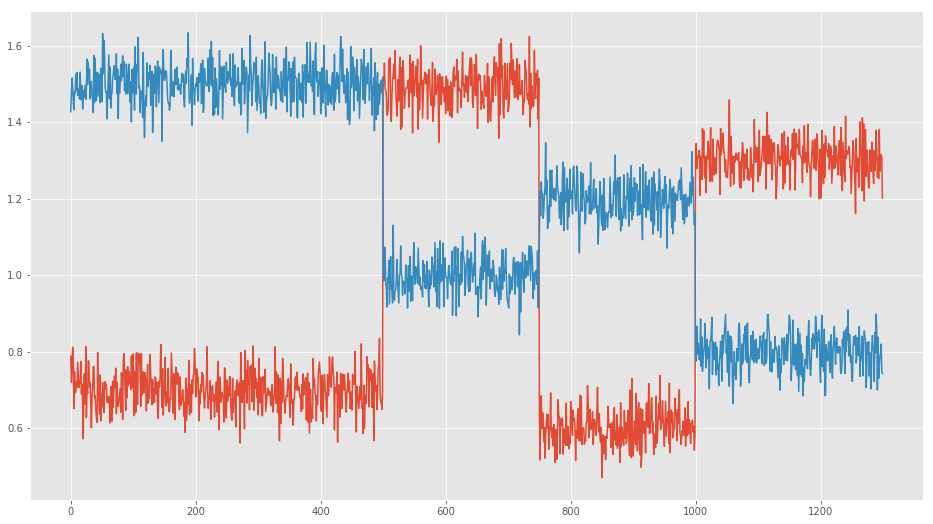

In [5]:
#可視化
plt.figure(figsize=(16, 9))
plt.plot(x1)
plt.plot(x2)

## パラメータの設定

In [6]:
# パラメータ設定
k = 3 # ARモデルの次数
r = 0.01 #忘却係数
T = 7
T_ = 7

## ChangeFinderの実行

In [7]:
cf = ChangeFinder(r ,T, T_, k)

In [8]:
for i in range(len(x)):
    cf.update(x[i])

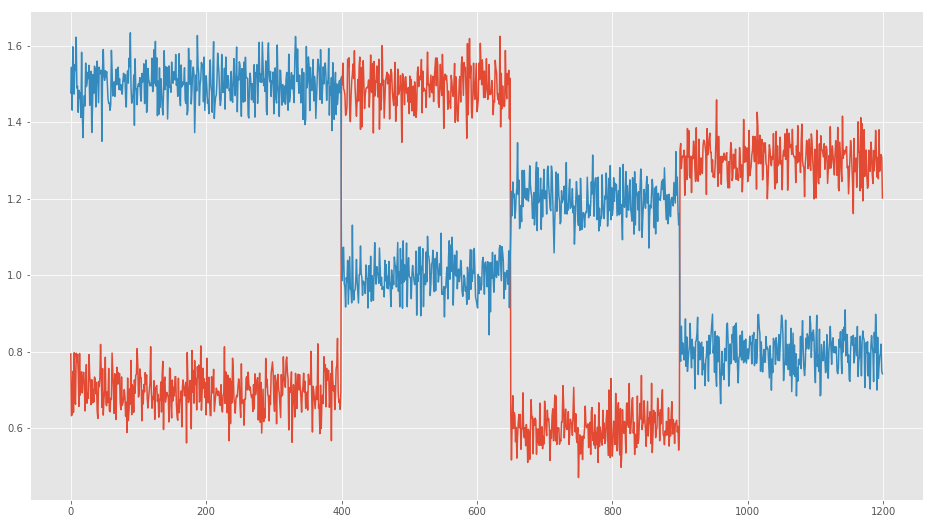

In [9]:
start = 100
#可視化
plt.figure(figsize=(16, 9))
plt.plot(x1[start:])
plt.plot(x2[start:])

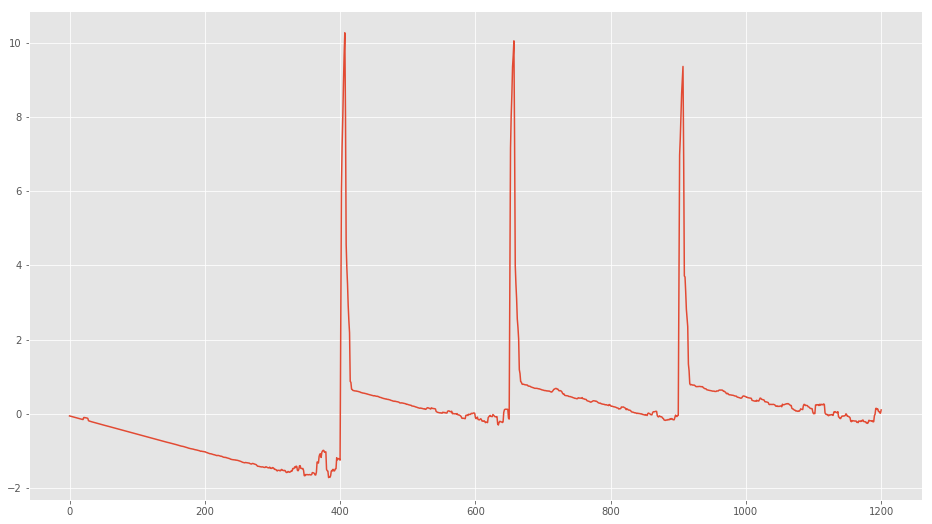

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(cf.S_T[start:])

## 日経平均株価にChangeFinderを適用(前日との変動, 当日の株価終値)

## データの読み込み

In [11]:
df = pd.read_csv("data/nikkei225_d.csv")
display(df.head())

,Date,Open,High,Low,Close
0,1986/01/04,13118.50,13142.33,13105.97,13136.87
1,1986/01/06,13129.05,13145.54,13053.22,13053.79
2,1986/01/07,13034.57,13037.68,12933.50,12991.24
3,1986/01/08,12997.74,13057.46,12996.80,13056.42
4,1986/01/09,13036.08,13062.26,12959.21,13034.19


## データの加工

In [12]:
df_diff = df.iloc[:, 1:].diff()
df_diff.columns = ["%s_diff" % i for i in df_diff.columns]
df_diff["Date"] = df.Date
display(df_diff.head())

,Open_diff,High_diff,Low_diff,Close_diff,Date
0,NaN,NaN,NaN,NaN,1986/01/04
1,10.55,3.21,-52.75,-83.08,1986/01/06
2,-94.48,-107.86,-119.72,-62.55,1986/01/07
3,-36.83,19.78,63.30,65.18,1986/01/08
4,38.34,4.80,-37.59,-22.23,1986/01/09


In [13]:
df = df.merge(df_diff)
df = df[1:]
df = (df.iloc[:, 1:] - df.iloc[:, 1:].min())/(df.iloc[:, 1:].max() - df.iloc[:, 1:].min())

display(df.head())

,Open,High,Low,Close,Open_diff,High_diff,Low_diff,Close_diff
1,0.190487,0.189749,0.190317,0.188281,0.590196,0.497048,0.603997,0.576291
2,0.187522,0.186363,0.186556,0.186318,0.574050,0.466366,0.592988,0.579443
3,0.186366,0.186984,0.188544,0.188364,0.582912,0.501626,0.623075,0.599055
4,0.187569,0.187135,0.187364,0.187666,0.594468,0.497488,0.606489,0.585634
5,0.187501,0.186345,0.188305,0.186537,0.588241,0.489214,0.617594,0.583523


In [14]:
# 終値
#x = np.array(df.Close_diff)
# [終値, 前日との変動]
x = np.concatenate([df.Close[:, np.newaxis], df.Close_diff[:, np.newaxis]], axis=1)

## パラメータの設定

In [15]:
# パラメータ設定
k = 4 # ARモデルの次数
r = 0.005 #忘却係数
T = 5
T_ = 5

In [16]:
## ChangeFinderの実行

In [17]:
cf = ChangeFinder(r, T, T_, k)

In [18]:
for i in range(len(x)):
    cf.update(x[i])

## 可視化

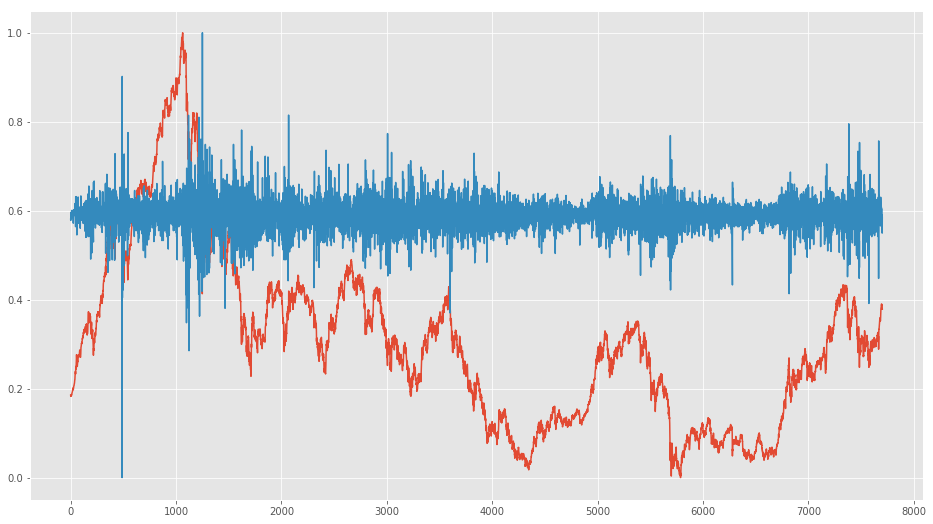

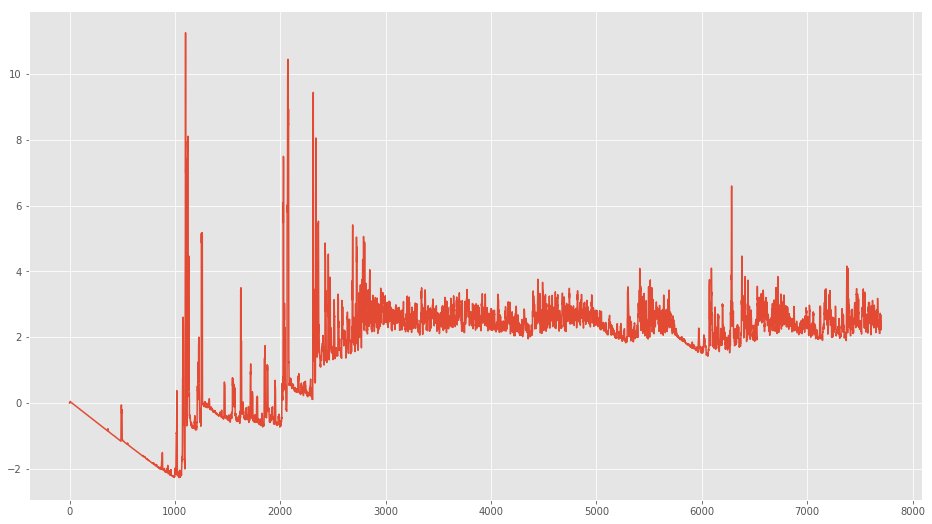

In [19]:
start = 10
#可視化
plt.figure(figsize=(16, 9))
plt.plot(x[start:])

plt.figure(figsize=(16, 9))
plt.plot(cf.S_T[start:])

In [20]:
df["S_X"] = cf.S_X[1:]
df["S_T"] = cf.S_T[1:]
df["y"] = cf.y[1:]

In [21]:
df.describe()

,Open,High,Low,Close,Open_diff,High_diff,Low_diff,Close_diff,S_X,S_T,y
count,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000,7712.000000
mean,0.308442,0.310868,0.306856,0.308472,0.588692,0.496378,0.612794,0.589166,1.198281,1.603344,1.196417
std,0.196422,0.197317,0.195633,0.196412,0.035469,0.054543,0.037211,0.037210,10.503862,1.600722,6.499541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.321796,-2.265290,-8.369813
25%,0.141799,0.142892,0.141820,0.141987,0.571219,0.468691,0.596479,0.571542,-5.984693,0.261759,-3.825976
50%,0.295172,0.298194,0.293313,0.295302,0.589235,0.496398,0.614487,0.589993,-2.970923,2.235486,-0.550975
75%,0.403998,0.406569,0.403025,0.403946,0.607164,0.524974,0.631823,0.608358,3.001522,2.628961,4.952383
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.328436,11.253797,25.328436
